In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("weatherAUS.csv")

In [83]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96732,2009-08-17,Adelaide,11.1,17.2,2.0,13.0,8.3,WNW,39.0,WNW,...,58.0,53.0,1020.9,1022.2,NaN,NaN,14.3,16.0,Yes,No
84084,2008-09-16,Brisbane,15.4,26.9,0.0,4.8,10.3,SE,33.0,N,...,61.0,63.0,1016.7,1013.1,1.0,1.0,23.4,25.4,No,No
50186,2012-03-09,Tuggeranong,10.9,23.6,3.8,NaN,NaN,W,31.0,N,...,98.0,54.0,1009.7,1008.1,NaN,NaN,12.4,22.1,Yes,No
10740,2013-11-07,CoffsHarbour,12.7,25.5,0.0,5.4,NaN,NE,50.0,NNW,...,53.0,57.0,1018.2,1015.0,1.0,0.0,22.4,23.6,No,No
108731,2009-05-10,Albany,13.4,24.0,0.0,3.0,1.6,NaN,NaN,N,...,62.0,53.0,1019.9,1018.6,8.0,8.0,15.5,20.0,No,Yes


In [84]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek

df["Month_sin"] = np.sin(2*np.pi * df["Month"]/12)
df["Month_cos"] = np.cos(2*np.pi * df["Month"]/12)
df["DayOfWeek_sin"] = np.sin(2*np.pi * df["DayOfWeek"]/7)
df["DayOfWeek_cos"] = np.cos(2*np.pi * df["DayOfWeek"]/7)

In [85]:
df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,Year,Month,Day,DayOfWeek,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
115685,2012-01-01,PearceRAAF,18.2,28.8,0.0,NaN,2.7,SSW,39.0,SE,...,No,No,2012,1,1,6,0.500000,8.660254e-01,-0.781831,0.623490
112374,2011-02-03,Witchcliffe,13.7,27.7,0.0,NaN,NaN,SSE,54.0,SE,...,No,NaN,2011,2,3,3,0.866025,5.000000e-01,0.433884,-0.900969
90539,2009-09-26,GoldCoast,16.8,28.2,0.0,NaN,NaN,W,52.0,NNW,...,No,No,2009,9,26,5,-1.000000,-1.836970e-16,-0.974928,-0.222521


In [86]:
df.Location.nunique()

49

In [87]:
df.WindGustDir.nunique()

16

In [88]:
df.RainToday.nunique()

2

In [89]:
df.RainTomorrow.nunique()

2

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

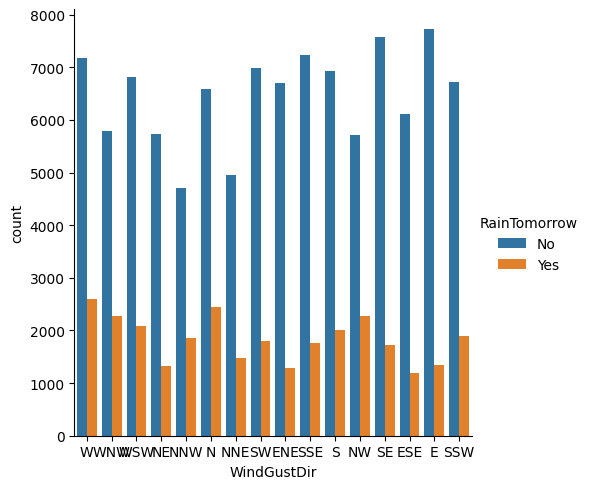

In [91]:
sns.catplot(x = "WindGustDir" , hue= "RainTomorrow" ,data = df , kind = "count")

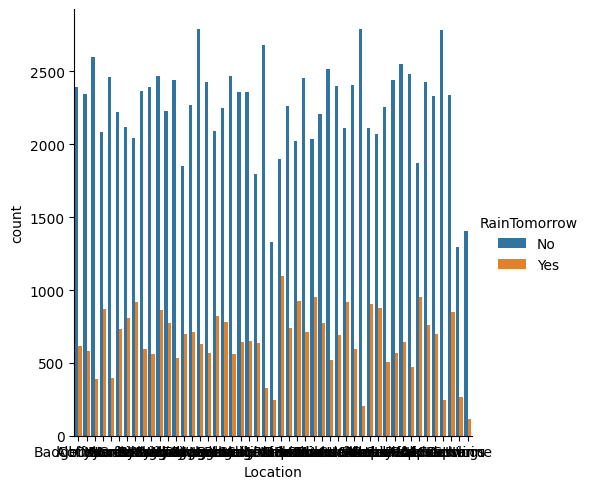

In [92]:
sns.catplot(x = "Location" , hue = "RainTomorrow" , data = df , kind = "count")

In [93]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
DayOfWeek            0
Month_sin            0
Month_cos            0
DayOfWeek_sin        0
DayOfWeek_cos        0
dtype: int64

In [94]:
# Example: Fill numerical columns with their mean, categorical columns with mode
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())


In [95]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
DayOfWeek        0
Month_sin        0
Month_cos        0
DayOfWeek_sin    0
DayOfWeek_cos    0
dtype: int64

In [96]:
df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,Year,Month,Day,DayOfWeek,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
91119,2011-05-29,GoldCoast,13.7,23.2,0.6,5.468232,7.611178,SE,46.0,S,...,No,Yes,2011,5,29,6,5.000000e-01,-0.866025,-0.781831,0.623490
136784,2010-11-14,AliceSprings,18.8,30.8,0.0,4.800000,7.100000,SSW,78.0,NNE,...,No,Yes,2010,11,14,6,-5.000000e-01,0.866025,-0.781831,0.623490
87013,2016-12-21,Brisbane,22.1,34.1,0.0,7.000000,8.800000,WSW,26.0,NW,...,No,No,2016,12,21,2,-2.449294e-16,1.000000,0.974928,-0.222521


In [140]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       ...
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object', length=120)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [98]:
df = pd.get_dummies(df , columns = ["Location" , "WindGustDir" , "WindDir9am" , "WindDir3pm" , "RainToday"] , drop_first=True)

In [99]:
df.shape

(145460, 120)

In [101]:
df.select_dtypes(include =["object"]).columns

Index(['RainTomorrow'], dtype='object')

In [102]:
df =df = pd.get_dummies(df , columns = ["RainTomorrow"] , drop_first=True)

In [109]:
df.corr()["RainTomorrow_Yes"]

Date               -0.013328
MinTemp             0.082173
MaxTemp            -0.156851
Rainfall            0.233900
Evaporation        -0.088288
                      ...   
WindDir3pm_W        0.020417
WindDir3pm_WNW      0.031614
WindDir3pm_WSW      0.000482
RainToday_Yes       0.305744
RainTomorrow_Yes    1.000000
Name: RainTomorrow_Yes, Length: 120, dtype: float64

In [112]:
X = df.drop(columns=["Date" , "RainTomorrow_Yes"])
y = df["RainTomorrow_Yes"]


In [113]:
X.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
42485,14.8,27.3,0.0,5.468232,7.611178,54.0,9.0,9.0,82.000000,57.0,...,False,False,False,False,False,False,False,False,False,False
54777,-3.0,3.9,0.0,5.468232,7.611178,33.0,6.0,6.0,68.880831,87.0,...,False,False,False,False,False,False,True,False,False,False
40370,8.3,20.9,0.0,5.468232,7.611178,52.0,28.0,30.0,59.000000,42.0,...,False,False,False,False,False,False,False,True,False,False


In [114]:

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index([], dtype='object')


In [116]:
X.shape

(145460, 118)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [118]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense , Dropout
from keras import Sequential

In [119]:
model = Sequential()

model.add(Dense(120 , activation="relu" , input_dim = 118))
model.add(Dropout(0.1))
model.add(Dense(60 , activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(30 , activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1 , activation= "sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 120)               14280     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [129]:
model.compile(loss='binary_crossentropy', optimizer="adam" , metrics = ["accuracy"])

In [130]:
# Convert to float32 (common type used in TensorFlow)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')


In [138]:
X_train.sample()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
112352,15.1,33.0,0.0,5.468232,7.611177,31.0,13.0,20.0,41.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/10
3637/3637 [==============================] - 14s 4ms/step - loss: 0.3745 - accuracy: 0.8393 - val_loss: 0.3772 - val_accuracy: 0.8403
Epoch 2/10
3637/3637 [==============================] - 12s 3ms/step - loss: 0.3740 - accuracy: 0.8387 - val_loss: 0.3675 - val_accuracy: 0.8441
Epoch 3/10
3637/3637 [==============================] - 13s 4ms/step - loss: 0.3746 - accuracy: 0.8390 - val_loss: 0.3686 - val_accuracy: 0.8435
Epoch 4/10
3637/3637 [==============================] - 14s 4ms/step - loss: 0.3737 - accuracy: 0.8392 - val_loss: 0.3732 - val_accuracy: 0.8454


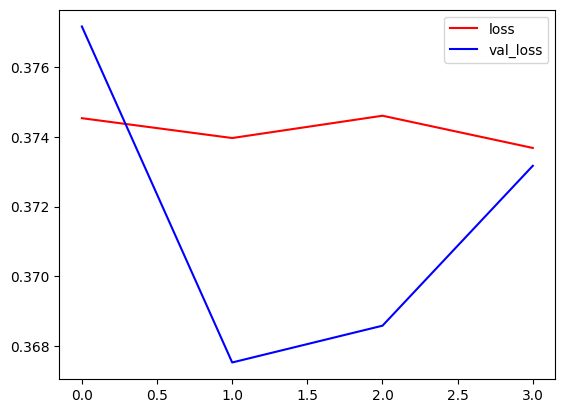

In [135]:
plt.plot(history.history["loss"] , color = "red" , label = "loss")
plt.plot(history.history["val_loss"] , color = "blue" , label = "val_loss")
plt.legend()
plt.show()

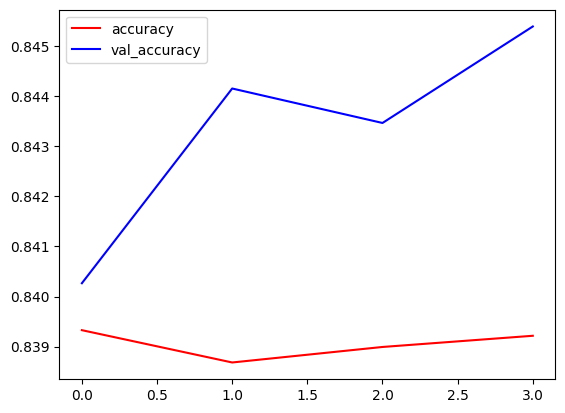

In [137]:
plt.plot(history.history["accuracy"] , color = "red" , label = "accuracy")
plt.plot(history.history["val_accuracy"] , color = "blue" , label = "val_accuracy")
plt.legend()
plt.show()

In [146]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

data = {
    'Date': ['2008-12-01'],
    'Location': ['Albury'],
    'MinTemp': [13.4],
    'MaxTemp': [22.9],
    'Rainfall': [0.6],
    'Evaporation': [np.nan],
    'Sunshine': [np.nan],
    'WindGustDir': ['W'],
    'WindGustSpeed': [44],
    'WindDir9am': ['W'],
    'WindDir3pm': ['WNW'],
    'WindSpeed9am': [20],
    'WindSpeed3pm': [24],
    'Humidity9am': [71],
    'Humidity3pm': [22],
    'Pressure9am': [1007.7],
    'Pressure3pm': [1007.1],
    'Cloud9am': [8],
    'Cloud3pm': [np.nan],
    'Temp9am': [16.9],
    'Temp3pm': [21.8],
    'RainToday': ['No'],
    'RainTomorrow': ['No']
}

new_data = pd.DataFrame(data)
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols)

new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

new_data_encoded_imputed = imputer.transform(new_data_encoded)
new_data_encoded_imputed = pd.DataFrame(new_data_encoded_imputed, columns=X_train.columns)

try:
    predictions = model.predict(new_data_encoded_imputed)
    print("Predictions:", predictions)
except Exception as e:
    print("Error during prediction:", str(e))


1/1 [==============================] - 0s 32ms/step
Predictions: [[1.1821425e-06]]


In [147]:
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

prediction_labels = ["Yes" if pred == 1 else "No" for pred in binary_predictions]

print("Predictions:", prediction_labels)

Predictions: ['No']
